<a href="https://colab.research.google.com/github/dlvvkfl88/MSAISCHOOL/blob/main/MS_AI_SCHOOL_56%EC%9D%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%80%EA%B3%B5_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #크롤링 재복습


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

import time
import os
import urllib, requests

query = "mango"
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)


WebDriverException: ignored

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

options = Options()
options.add_argument("start-maximized")

webdriver_service = Service('C:\webdrivers\chromedriver.exe')
driver = webdriver.Chrome(options=options, service=webdriver_service)

WebDriverException: ignored

In [ ]:
# !
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import subprocess
import time
import os
import urllib, requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [ ]:
query = "mango"
service =Service("C:/Users\kmjj1/helloworld/chromedriver.exe")
driver = webdriver.Chrome(service=service)

driver.get("https://www.google.com/imghp?hl=ko&tab=ri&ogbl")
keyword = driver.find_elements_by_xpath(
    '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea'
    )
keyword.send_keys(query)

driver.find_elements_by_xpath(
    '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button'
).click()

print(f"{query} 스크롤 내리는 중...")
elem = driver.find_elements_by_tag_name("body")
for i in range(60):
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.1) # 0.1초씩 딜레이

try:
    driver.find_elements_by_xpath(
        '/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[2]/div[2]/input'
        ).click()
    for i in range(60):
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.1)
except:
    pass


link = []
images = driver.find_elements_by_css_selector("img.rg_i.Q4LuWd")


for image in images:
    if image.get_attribute('src') != None:
        links.append(image.get_attribute('src'))
    elif image.get_attribute("data-src") != None:
        links.append(image.get_attribute("data-src"))
    elif image.get_attribute("data-iurl") != None:
        links.append(image.get_attribute("data-iurl"))

print(f"{query} 찾은 이미지 개수: {len(links)}")
time.sleep(1)

count = 0
for i in links:
    start = time.time()
    url = i
    os.makedirs(f"./{query}_img_dataset/", exist_ok=True)
    while True:
        try:
            urllib.request.urlretrieve(url, f"./{query}_img_dataset/{count:04}_{query}.png")
            print(f"{count + 1} / {len(links)} / {query} / 다운로드 시간: {time.time() - start} 초")
            break
        except Exception as e:
            print(f"HTTPError 발생 ({e}): 재시도중...")
            time.sleep(5)

        if time.time() - start > 60:
            print(f"{query} 이미지 다운로드 실패")
            break

    count = count + 1

print(f"{query} 다운로드 완료")
driver.close()

# 동영상 데이터분선

In [7]:
from pytube import YouTube
from IPython.display import HTML

url = "https://www.youtube.com/watch?v=ILqJOHYYlkc"

yt = YouTube(url)

stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()

stream.download()



'/content/홈페이지 배경 샘플 영상 - 바다.mp4'

In [10]:
import cv2
import os
cap = cv2.VideoCapture('/content/홈페이지 배경 샘플 영상 - 바다.mp4')

# print(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # 총 몇프레임인지 나옴
# print(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # 길이
# print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # 높이

# print(cap.get(cv2.CAP_PROP_FPS)) # 프레임

img_count = 0
os.makedirs("/content/sample_data", exist_ok= True)

while True :
  ret, frame = cap.read()

  if not ret:
    break
# 15프레임마다 수행하겠다.

  if img_count % 15 ==0:
    img_filename = f"/content/sample_data/frame_{img_count:04}.png"
    cv2.imwrite(img_filename, frame)


  img_count += 1


cap.release()



(191, 264, 3)


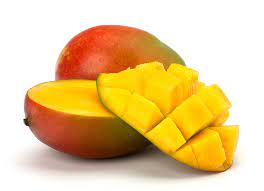

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(img.shape)

img = cv2.imread("/content/망고.jpg")
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

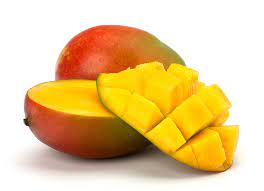

In [23]:
cropped_img = cv2.resize(img ,(250,250))
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

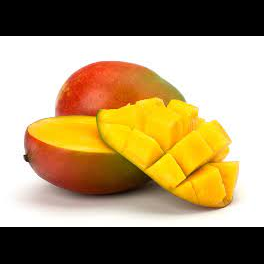

In [30]:
#
h,w,c = img.shape
black_bg = np.zeros((264 ,264, 3 ))
start_h = (264 - h )//2 # 양쪽으로
black_bg[start_h:start_h + h,:] = img
cv2_imshow(black_bg)
cv2.waitKey()
cv2.destroyAllWindows()